# Исследование по продажам компьютерных игр

Нам предстоит исследовать исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Цель исследования: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## План работы

Шаг 1. Открыть файл с данными и изучить общую информацию  
Шаг 2. Подготовить данные
 - Заменить названия столбцов;
 - Преобразовать данные в нужные типы;
 - Обработать пропуски;
 - Описать причины, которые могли привести к пропускам;
 - Разобрать аббревиатуру 'tbd'
 - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
Шаг 3. Исследовательский анализ данных
 - Выявить, сколько игр выпускалось в разные годы. 
 - Понять, как менялись продажи по платформам. 
 - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сделать выводы.
 - Соотнести выводы с продажами игр на других платформах.

Шаг 4. Портрет пользователя каждого региона

Шаг 5. Проверка гипотез
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Общий вывод

## Описание данных
 
 Name — название игры
 
 Platform — платформа
 
 Year_of_Release — год выпуска
 
 Genre — жанр игры
 
 NA_sales — продажи в Северной Америке (миллионы проданных копий)
 
 EU_sales — продажи в Европе (миллионы проданных копий)
 
 JP_sales — продажи в Японии (миллионы проданных копий)
 
 Other_sales — продажи в других странах (миллионы проданных копий)
 
 Critic_Score — оценка критиков (максимум 100)
 
 User_Score — оценка пользователей (максимум 10)
 
 Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1. Открываем данные и изучаем информацию

### 1.1 Импортируем библиотеку pandas

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### 1.2 Загружаем таблицу с данными

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')


### 1.3 Смотрим информацию по датасету

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В таблице имеется 11 стоблцов и 16715 строк. Критическое количество пропусков в столбце Critic_Score - остуствует почти половина значений, а также в столбцах Rating и User_Score**

### 1.4 Изучим случайную выборку строк таблицы

In [4]:
data.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15446,Minna de Dokusho: Keatai Shousetsu Desu,PSP,2008.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14517,Dancing Blade II: Tears of Eden,PS,1999.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
2102,Tetris 2,NES,1993.0,Puzzle,0.62,0.13,0.21,0.02,NaN,NaN,NaN
5467,Fracture,X360,2008.0,Shooter,0.15,0.14,0.00,0.04,63.0,6.2,T
1982,MVP Baseball 2003,PS2,2003.0,Sports,0.51,0.40,0.00,0.13,81.0,8.9,E
15983,Mission: Impossible - Operation Surma,GC,2004.0,Platform,0.01,0.00,0.00,0.00,64.0,tbd,T
10191,Naval Ops: Warship Gunner,PS2,2003.0,Simulation,0.05,0.04,0.00,0.01,67.0,8.9,T
6743,Choro Q2,PS,1997.0,Racing,0.00,0.00,0.23,0.02,NaN,NaN,NaN
6492,Project CARS,XOne,2015.0,Racing,0.11,0.13,0.00,0.02,81.0,5.8,E
840,Carnival Games,DS,2008.0,Misc,1.21,0.63,0.00,0.19,48.0,3.3,E


Нужно предобразовать тип данных в колонках:

Year_of_Release

А также привести к единому стилю названия колонок.

In [5]:
data.tail(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


# 2. Предобработка данных

### 2.1 Заменим названия столбцов

In [6]:
data.columns= data.columns.str.strip().str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Преобразование типа данных

Надо преобразовать тип в колонке с годом выпуска из вещественного в целое число

Прежде, чем это сделать, нужно удалить строки, которые не заполнены, поскольку их всего 269. Их удаление не повлияет на исследование. 

In [7]:
data = data.dropna(subset=['year_of_release'])
data = data.reset_index(drop=True)

In [8]:
data['year_of_release'] = data['year_of_release'].astype(int)

### 2.3 Заполнение пропусков

Пропущенные значения обнаружены в столбцах с рейтингом пользователей и критиков, которые будут использованы в исследовании. 
Их синтетическое заполнение может привести к некорректной оценке данных, поэтому принято решение оставить эти значения как есть.
В колонке с оценками пользователей в некоторых строках используется сокращение tbd (To Be Determined). Это может значить, что значение будет опредлено позже. Чтобы заполнить эти значения синтетически, не хватает данных, поэтому заменим их нулем.
В дальнейшем нам понадобится числовой формат в данных по user_score, чтобы построить матрицу корреляции, например. Поэтому нужно заменить значения NaN на 0

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Функция для замены значения 'tbd' на NaN
def replace_tbd(tbd, nan):
    data['user_score'] = data['user_score'].replace(tbd, nan)
    
replace_tbd('tbd', np.NaN)
#проверяем уникальные значения в столбце после применения функции
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
data['user_score'] = data['user_score'].fillna(0)

In [12]:
data['user_score'] = data['user_score'].astype(float)

### 2.4 Создаем столбец с суммарными продажами по регионам

In [13]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
data.head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82


### Вывод по разделу

На этапе предобработки данных:
 - приведены к единому стилю названия столбцов
 - проанализированы пропущенные значения (принято решение оставить пропуски в столбцах с рейтингом пользователей и критиков из-за недостаточности данных для их синтетического заполнения)
 - заменены значения tbd в user_score для преобразования типа данных в целое число 
 - преобразован тип данных в year_of_release и user_score в целочисленный
 - создан столбец с общей суммой объема продаж (total_sales)

# 3. Исследовательский анализ данных

### 3.1 Анализ выпуска игр по годам

Построим график, который покажет, сколько игр выходило по годам

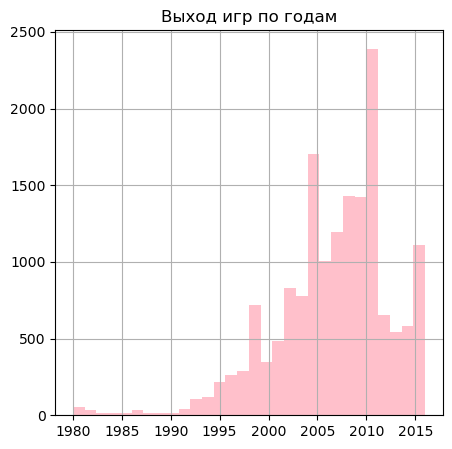

In [15]:
data['year_of_release'].hist(figsize=(5, 5), bins=30, color ='pink');
plt.title('Выход игр по годам');

Судя по графику, максимальное количество игр было выпущено в 2011 году - около 2400 игр. В последующие годы наблюдается резкий спад до 600 игр. В 2016 игр выпускается немного больше - уже около 1100. 

### 3.2 Анализ продаж по платформам

Сгруппируем данные по платформам и выберем 10 из них с самыми высокими суммарными продажами.

In [16]:
platform_top = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_top.head(10)

platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.74
PS       686.89
GBA      305.27
PS4      265.79
PSP      248.77
GB       246.27
Name: total_sales, dtype: float64

Построим графики по каждой из лидирующих платформ, чтобы увидеть, как распределяются продажи игр топовой десятки платформ по годам

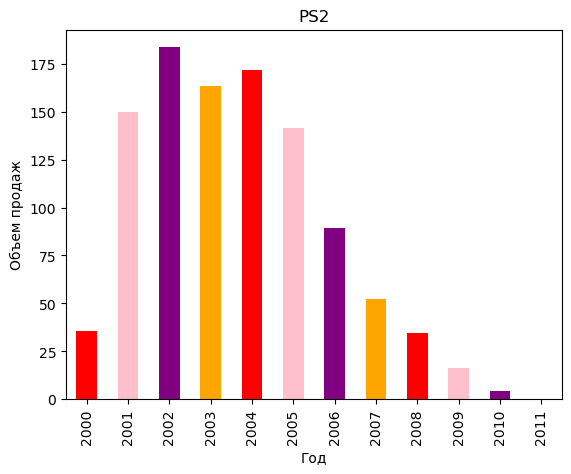

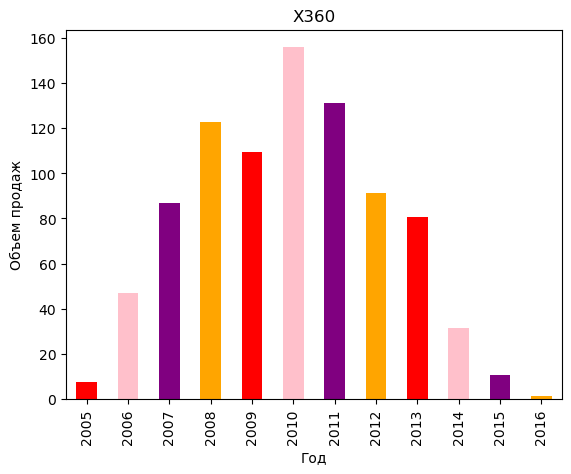

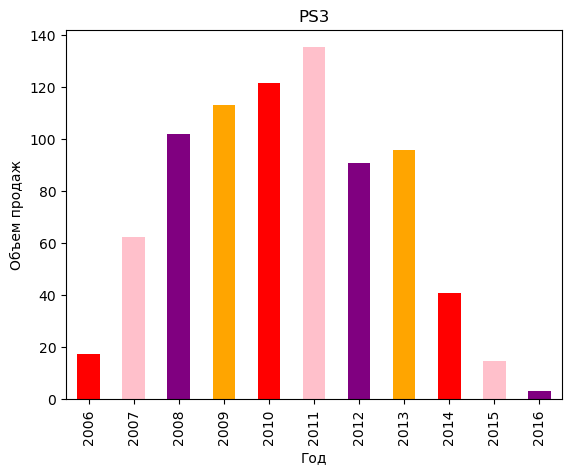

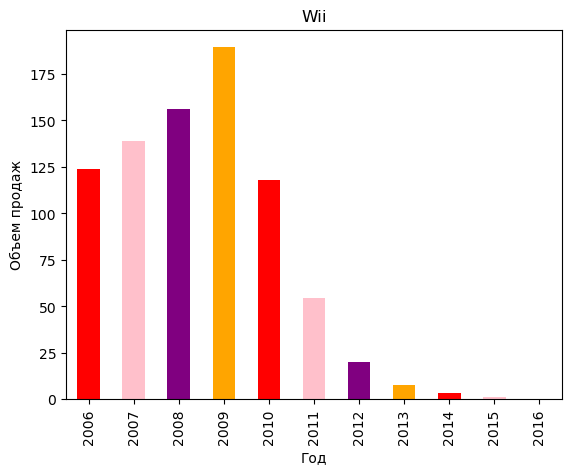

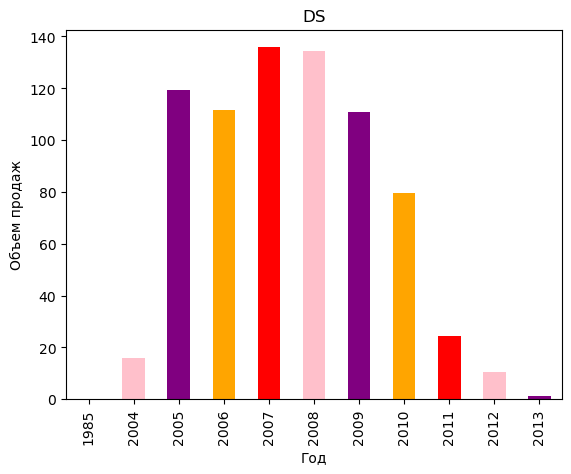

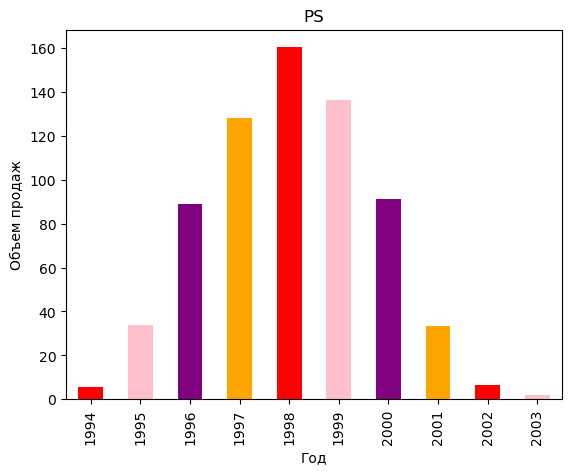

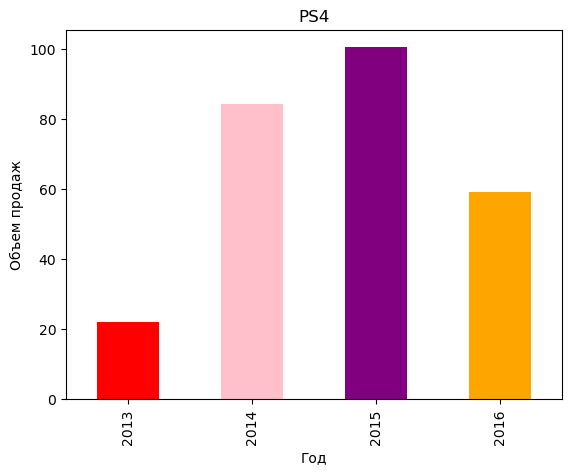

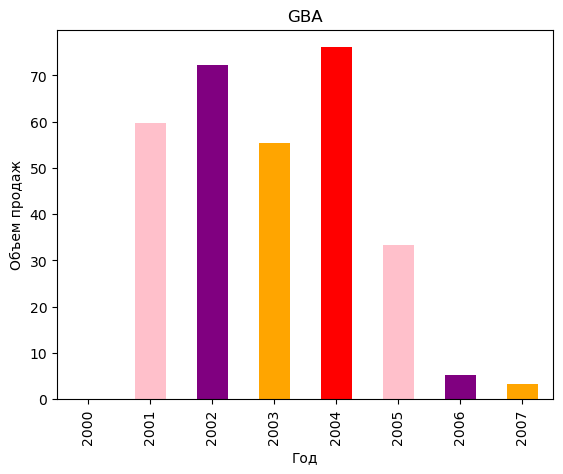

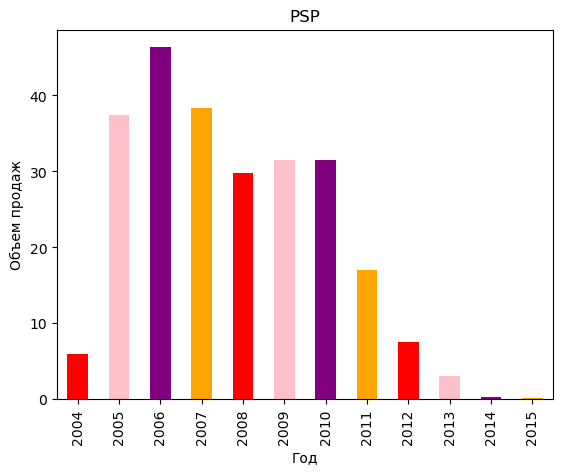

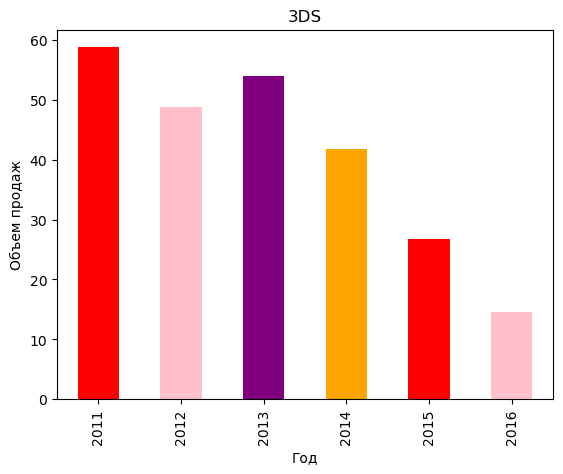

In [17]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
for platform in top_platforms:
    data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', 
                                                                                            color=["red", "pink", "purple", "orange"])
    plt.title(platform)
    plt.ylabel('Объем продаж')
    plt.xlabel('Год')
    plt.show()

Большинство платформ выпускают игры в течение 10 лет. Выделим те платформы, которые выпустили последние игры не позднее 2016 года: X360, PS3, Wii, PS4, 3DS. Примечательно, что перед тем, как перестать выпускать игры, продажи платформ падают. Пик продаж приходится, в основном, на 4,5 и 6 год выпуска.

Для дальнейшего анализа будем брать 2014-2016 года, поскольку этот период описывает актуальую ситуацию для будущего прогнозирования на 2017 год.

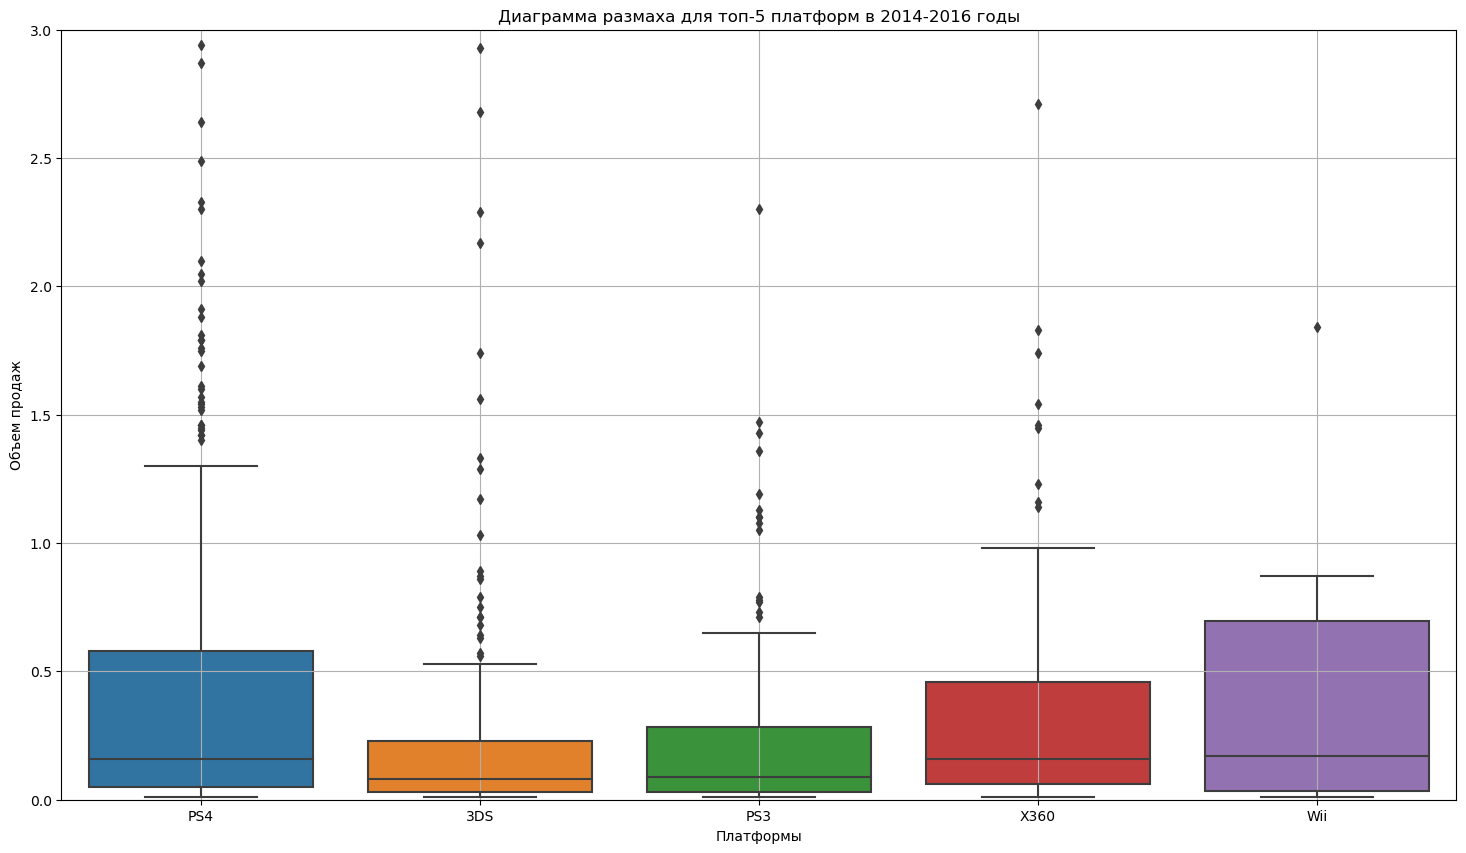

In [19]:
#построим диаграммы размаха для выбранных платформ и актуального периода 
plt.figure(figsize=(18,10))
sns.boxplot(data=data.query('year_of_release > 2013 and platform ==["X360", "PS3", "Wii", "PS4", "3DS"]'), x = 'platform', y= 'total_sales')
plt.ylim(0,3)
plt.grid(True)
plt.title('Диаграмма размаха для топ-5 платформ в 2014-2016 годы')
plt.ylabel('Объем продаж')
plt.xlabel('Платформы')
plt.show()

Диаграммы размаха показывают, что:
1) у всех платформ есть выбросы в данных (меньше всего у платформы Wii и больше всего у PS4)

2) медиана всех анализируемых платформ находится примерно на одном уровне - 0,2-0,3

3) значит, около 25% значений находится в диапазоне до 0.3

4) самый большой объем продаж, учитывая выбросы, у платформы PS4, следом идет X360, затем Wii, PS3 и 3DS

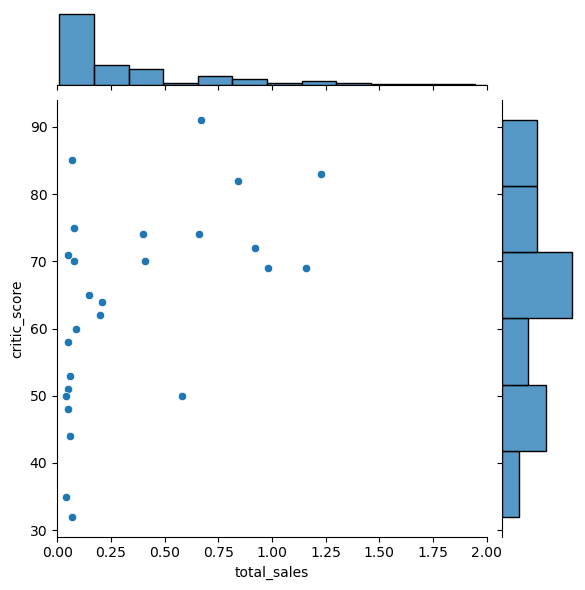

In [20]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
sns.jointplot(x='total_sales', y='critic_score', 
              data=data.query('platform == "X360" and year_of_release > 2013'),
              kind='scatter', xlim=(0,2));

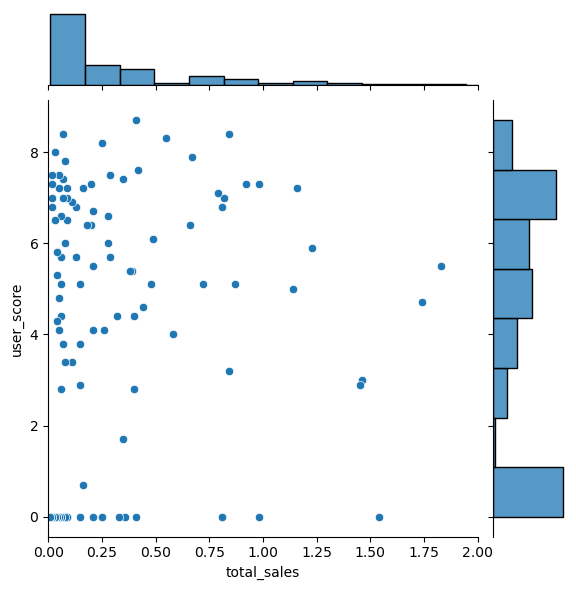

In [21]:
sns.jointplot(x='total_sales', y='user_score', 
              data=data.query('platform == "X360" and year_of_release > 2013'), 
              kind='scatter', xlim=(0,2));

#### Вывод

По графикам видно, что зависимость объема продаж от оценок критиков или пользователей не выражена и скорее отсутствует.

In [22]:
#считаем корреляцию между отзывами и продажами платформы Х360
matrix_X360= data.query('platform=="X360" and year_of_release > 2013')[['critic_score', 'total_sales', 'user_score']].corr()
matrix_X360

,critic_score,total_sales,user_score
critic_score,1.000000,0.523476,0.625309
total_sales,0.523476,1.000000,0.070855
user_score,0.625309,0.070855,1.000000


Итак, судя по табличке с корреляцией, пользовательские оценки и оценки критиков крайне мало влияют на продажи.
Так, например, в рассматриваемой платформе X360 коэффициент корреляции оценок критиков и продаж всего около 0,5, а влияние пользовательских оценок на продажи еще меньше - 0,07. То есть можно сделать вывод, что оценка пользователей не влияет на продажи. 

In [23]:
#изучим информацию о продажах по выбранным ранее платформам и за актуальный для исследования период
data.query('platform==["X360", "PS3", "Wii", "PS4", "3DS"] and year_of_release > 2013').groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.391509,1.122935,0.01,0.030,0.08,0.230,10.94
PS3,219.0,0.268539,0.532896,0.01,0.030,0.09,0.285,4.40
PS4,376.0,0.648059,1.358995,0.01,0.050,0.16,0.580,12.25
Wii,11.0,0.424545,0.571601,0.01,0.035,0.17,0.695,1.84
X360,111.0,0.395225,0.571941,0.01,0.060,0.16,0.460,3.88


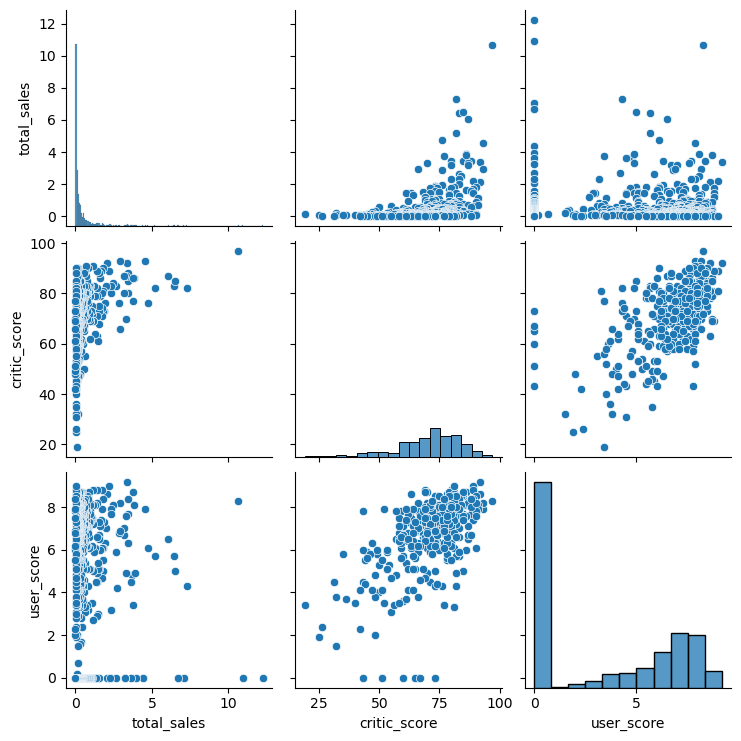

In [24]:
sns.pairplot(data.query('platform==["X360", "PS3", "Wii", "PS4", "3DS"] and year_of_release > 2013'), vars=["total_sales", "critic_score", "user_score"]);

Судя по получившемуся графику зависимости, наблюдается та же тенденция, что и показалась, когда мы рассматривали одну платформу - есть слабо выраженная зависимость от оценов критиков, но видно, что оценки пользователей на продажи все-таки не влияют. 

Посмотрим как продаются игры в разрезе жанров, построив столбчатую диаграмму.

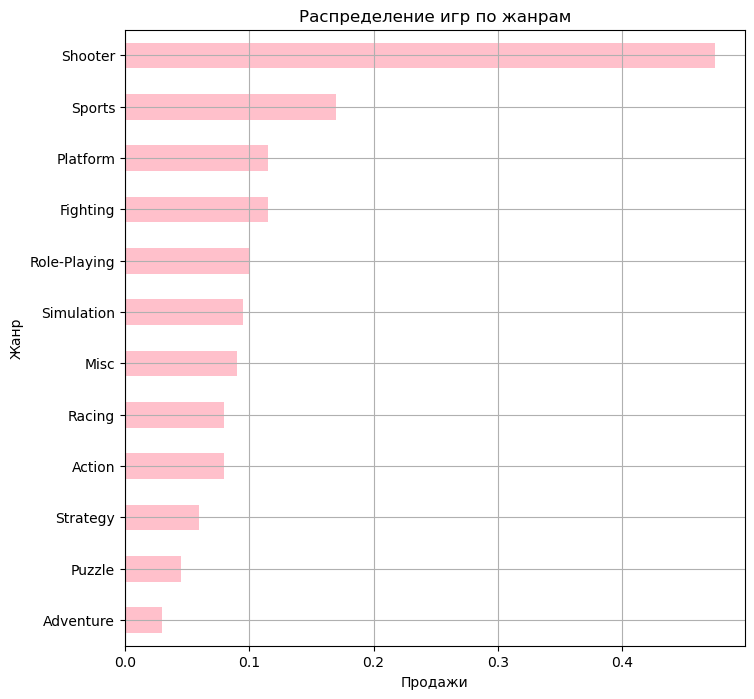

In [25]:
data.query('year_of_release > 2013').groupby('genre')['total_sales'].agg('median').sort_values(ascending=True).plot(kind='barh',
                                                                              grid=True, legend=False, 
                                                                              figsize=(8,8), 
                                                                              title='Распределение игр по жанрам', color='pink')
plt.ylabel('Жанр')
plt.xlabel('Продажи')
plt.show()

Самый продаваемый жанр - Shooter, этот жанр приносит оно ~480 миллионов проданных копий.

### Вывод по разделу

В результате анализа мы выделили топ-5 платформ, которые лидируют по продажам и выпускали свои последние игры не позднее 2016 года: X360, PS3, Wii, PS4, 3DS. Мы отметили, что перед тем, как перестать выпускать игры, продажи платформ падают. Пик продаж приходится, в основном, на 4,5 и 6 год выпуска.

Для дальнейшего анализа принято решение брать 2014-2016 года, поскольку этот период описывает актуальую ситуацию для будущего прогнозирования на 2017 год.

# 4. Портрет пользователя каждого региона

### 4.1 Самые популярные платформы (топ-5)

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [26]:
NA_gamer = data.query('year_of_release > 2013').groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
NA_gamer

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

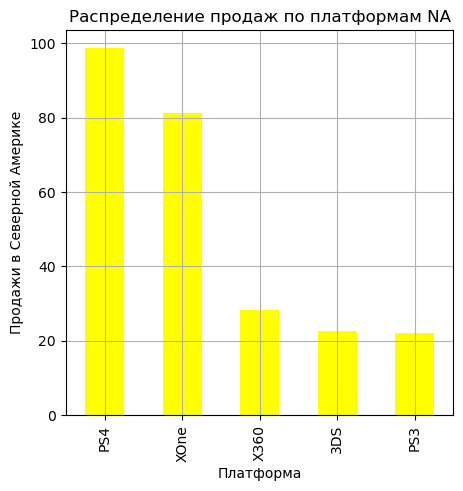

In [27]:
NA_gamer.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по платформам NA', color='yellow')
plt.ylabel('Продажи в Северной Америке')
plt.xlabel('Платформа')
plt.show()

In [28]:
EU_gamer = data.query('year_of_release > 2013').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
EU_gamer

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

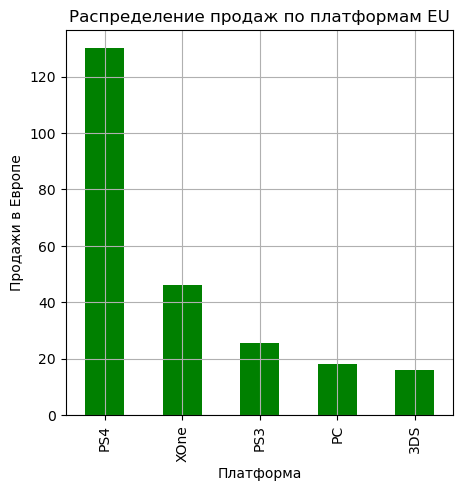

In [29]:
EU_gamer.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по платформам EU', color='green')
plt.ylabel('Продажи в Европе')
plt.xlabel('Платформа')
plt.show()

In [30]:
JP_gamer = data.query('year_of_release > 2013').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
JP_gamer

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

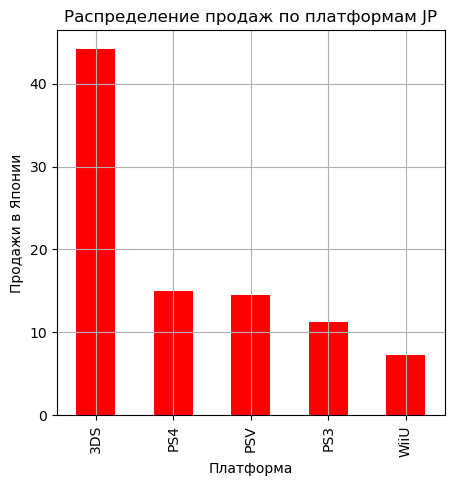

In [31]:
JP_gamer.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по платформам JP', color='red')
plt.ylabel('Продажи в Японии')
plt.xlabel('Платформа')
plt.show()

#### Вывод

Платформа PS4 лидирует по продажам в Северной Америке (98 млн проданных копий) и Европе (около 130 млн проданных копий). Следом идет XOne также в СА и Европе, и также наблюдаются существенные отличия в объемах продаж. В СА продано чуть больше 80 млн, а в Европе - почти вполовину меньше, около 45 млн. Третьей по популярности платформой в СА является X360 с объемом продаж - 28 млн. А в Европе это PS3 с примерно таким же объемом 25 млн. 
В Японии распредление продаж по платформам иное. Здесь лидером продаж является 3DS, за ним идут PS4 и PSV. Объем продаж у них значительно меньше, чем в СА и Европе. Почти в два раза. 

### 4.2 Самые популярные жанры (топ-5)

Выведем самые популярные жанры в разрезе территории.

In [32]:
NA_gamer_genre = data.query('year_of_release > 2013').groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
NA_gamer_genre

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [33]:
EU_gamer_genre = data.query('year_of_release > 2013').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
EU_gamer_genre

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [34]:
JP_gamer_genre = data.query('year_of_release > 2013').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
JP_gamer_genre

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

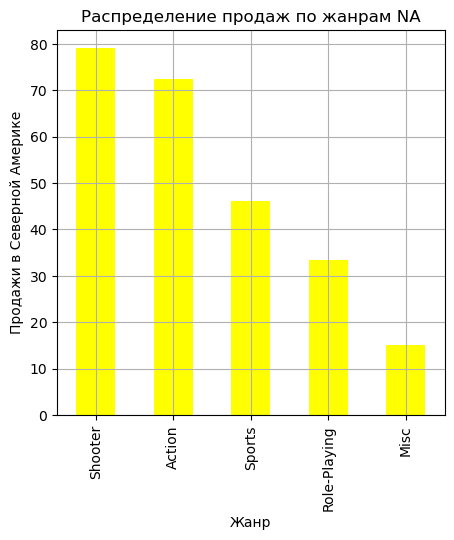

In [35]:
NA_gamer_genre.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по жанрам NA', color='yellow')
plt.ylabel('Продажи в Северной Америке')
plt.xlabel('Жанр')
plt.show()

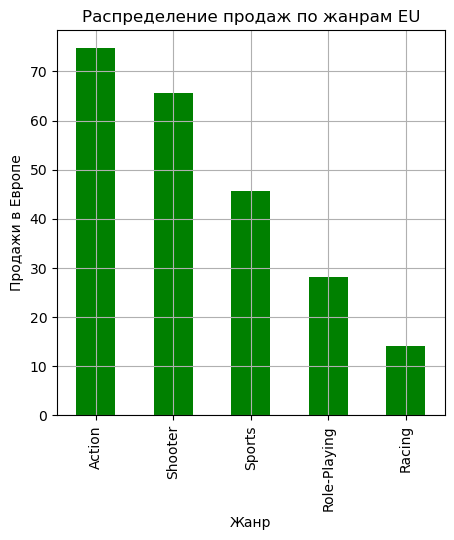

In [36]:
EU_gamer_genre.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по жанрам EU', color='green')
plt.ylabel('Продажи в Европе')
plt.xlabel('Жанр')
plt.show()

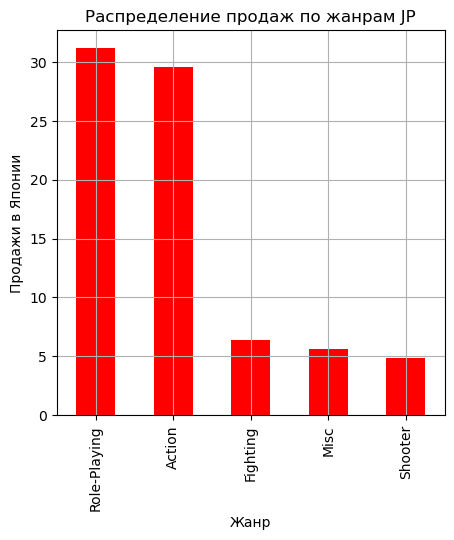

In [37]:
JP_gamer_genre.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по жанрам JP', color='red')
plt.ylabel('Продажи в Японии')
plt.xlabel('Жанр')
plt.show()

#### Вывод

В Северной Америке по жанрам лидируют стрелялки и экшн (79 и 72 соответственно)

В Европе - экшн и стрелялки (74 и 65)

В Японии - ролевые игры и экшн (31 и 29)

In [38]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [39]:
data['rating'] = data['rating'].fillna('ND') #не определены значения (not defined)

In [40]:
NA_gamer_rating = data.query('year_of_release > 2013').groupby('rating')['na_sales'].sum().sort_values(ascending=False)
NA_gamer_rating

rating
M       96.42
ND      64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

In [41]:
EU_gamer_rating = data.query('year_of_release > 2013').groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
EU_gamer_rating

rating
M       93.44
ND      58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

In [42]:
JP_gamer_rating = data.query('year_of_release > 2013').groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
JP_gamer_rating

rating
ND      56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

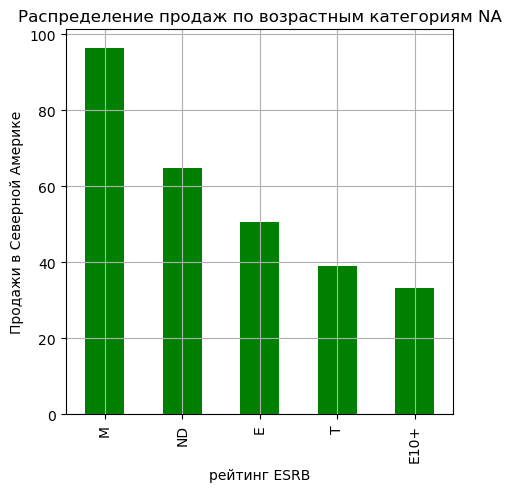

In [43]:
data.query('year_of_release > 2013').groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по возрастным категориям NA', color='green')
plt.ylabel('Продажи в Северной Америке')
plt.xlabel('рейтинг ESRB')
plt.show()

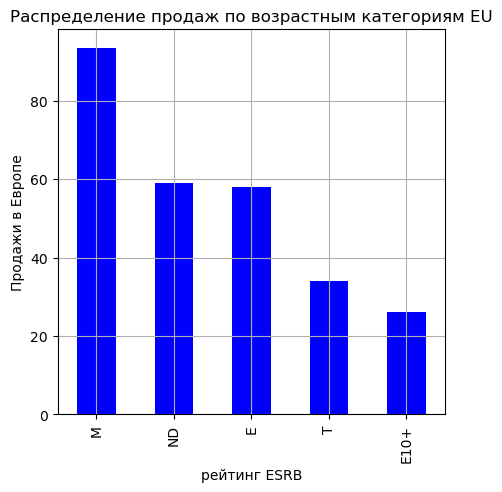

In [44]:
EU_gamer_rating.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по возрастным категориям EU', color='blue');
plt.ylabel('Продажи в Европе')
plt.xlabel('рейтинг ESRB')
plt.show()

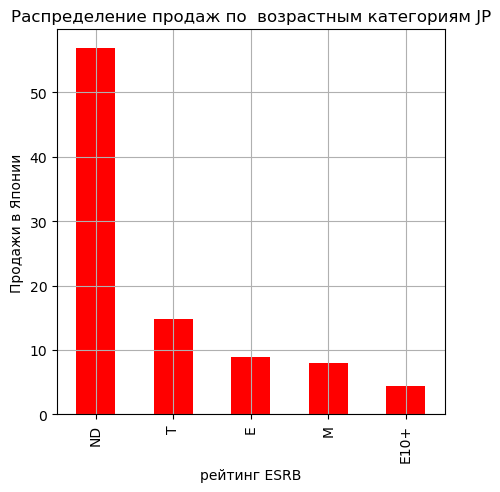

In [45]:
JP_gamer_rating.plot(kind='bar', grid=True, legend=False, figsize=(5,5), title='Распределение продаж по  возрастным категориям JP', color='red')
plt.ylabel('Продажи в Японии')
plt.xlabel('рейтинг ESRB')
plt.show()

#### Вывод по возрастной категории

Возрастные категории M (17+) и Е (для всех) лидируют по количеству продаж в Северной Америке и Европе. Много данных, где рейтинг не определен. 
В Японии данные распредлелись по-другому. Здесь преобладает категория T(13+)

### Вывод по разделу

В Северной Америке и Европе чаще всего продаются игры платформы PS4 в жанре стрелялки или экшн и в категории 17+. Судя по получившемуся портрету, основным покупаетелем является взрослый, который выпускает пар после работы.

В Японии больше всего продаются игры на платформе 3DS в жанре ролевых игр и экшн с категорией 13+. Скорее всего целевой аудиторией производителей являются подростки.

# 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

`H_0: Рейтинг пользователей (user_score) платформы  Xbox One = Рейтинг пользователей (user_score) платформы PC`

`H_1: Рейтинг пользователей (user_score) платформы  Xbox One ≠Рейтинг пользователей (user_score) платформы PC`

alpha = 0.05

In [47]:
Xbox_One = data.query('platform == "XOne" and year_of_release > 2013')['user_score']
PC = data.query('platform == "PC" and year_of_release > 2013')['user_score']
results = st.ttest_ind(
    Xbox_One, 
    PC, equal_var=False)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.31981092459798116
Не получилось отвергнуть нулевую гипотезу


2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

`H_0: Рейтинг пользователей (user_score) жанра Action = Рейтинг пользователей (user_score) жанра Sports`

`H_1: Рейтинг пользователей (user_score) жанра Action ≠ Рейтинг пользователей (user_score) жанра Sports`

alpha = 0.05


In [48]:
Action = data.query('genre == "Action" and year_of_release > 2013')['user_score']
Sports = data.query('genre == "Sports" and year_of_release > 2013')['user_score']
results = st.ttest_ind(
    Action, 
    Sports, equal_var=False)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.0006646333120910831
Отвергаем нулевую гипотезу


Нулевые гипотезы сформулированы так, чтобы все данные лежали в районе изначально предполагаемого значения. В первом случае 
мы предположили, что пользовательские оценки двух выбранных платформ одинаковы. Гипотеза подтвердилась. 
Во втором случае нам необходимо было выяснить, отличаются ли значения пользовательзовательского рейтинга двух разных жанров.
В качестве нулевой гипотезы мы предположили, что оценки одинаковы. Альтернативная гипотеза - оценки разные. Нулевая гипотеза отвергнута.
Оценки жанров отличаются.

Так как мы проверяем гипотезы о равенстве среднего двух генеральных совокупностей, то используем специальный метод проверки scipy.stats.ttest_ind (array1, array2, equal_var)

# 6. Общий вывод

Целью исследования было выявление определяющих успешность игры закономерностей. Это поможет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе исследования мы работали с данными до 2016 года включительно, чтобы спрогнозировать успешность игры в 2017 году. 

**Удалось выявить следующие полезные закономерности:**

- Перед тем, как перестать выпускать игры, продажи платформ падают. Пик продаж приходится, в основном, на 4,5 и 6 год выпуска.
- Оценки пользователей и критиков не влияет на продажи.
- В Северной Америке и Европе чаще всего продаются игры платформы PS4 в жанре стрелялки или экшн и в категории 17+. Судя по получившемуся портрету, основным покупаетелем является взрослый, который выпускает пар после работы.
- В Японии больше всего продаются игры на платформе 3DS в жанре ролевых игр и экшн с категорией 13+. Скорее всего целевой аудиторией японских производителей являются подростки.

Были выдвинуты и проверены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первая гипотеза о том, что пользовательские рейтинги двух выбранных платформ одинаковы подтвердилась. 
Вторая гипотеза о различии рейтингов двух жанров не подтвердилась. То есть пользовательский рейтинг не зависит от платформы или жанра. 

**Общие рекомендации:**

Производителям игр в Северной Америке и Европе стоит сделать ставку на выпуск игр в жанре Shooter и Action в категориях 17+ и для всех, так как они приносят больше всего продаж, судя по данным, взятым за актуальный период. 
В Японии самой продаваемой платформой показала себя 3DS. Жанры, на которые стоит обратить внимание: Role-Playing и Action. Целевая аудитория - подростки старше 13 лет. 
